# Assignments 7
Authors: Luis Denninger, Leon Herbrik

In [10]:
import torch 
import torchgadgets as tg
from tbparse import SummaryReader

from run import *
from utils import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Task 1: SVHN

### Model

In [11]:
exp_name = "svhn_gan"
run_name = "condgan_run_1"
epoch = 50
trainer = Trainer(exp_name, run_name)
load_model_from_checkpoint(exp_name, run_name, trainer.gan, epoch)

Using downloaded and verified file: ./data/svhn/train_32x32.mat


Using downloaded and verified file: ./data/svhn/test_32x32.mat
Model checkpoint was load from: /home/user/denninge/VisionLabSS23/Assignments_7/experiments/svhn_gan/condgan_run_1/checkpoints/checkpoint_50.pth


#### Generator

In [12]:
trainer.gan.generator

Generator(
  (latent_emb): Sequential(
    (0): Reshape()
    (1): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(2, 2))
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
  )
  (label_emb): Sequential(
    (0): Reshape()
    (1): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(10, 512, kernel_size=(4, 4), stride=(2, 2))
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
  )
  (model): Sequential(
    (0): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
    (1

In [13]:
trainer.gan.generator

Generator(
  (latent_emb): Sequential(
    (0): Reshape()
    (1): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(2, 2))
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
  )
  (label_emb): Sequential(
    (0): Reshape()
    (1): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(10, 512, kernel_size=(4, 4), stride=(2, 2))
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
  )
  (model): Sequential(
    (0): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
    (1

#### Discriminator

In [14]:
trainer.gan.discriminator

Discriminator(
  (img_emb): Sequential(
    (0): ConvBlock(
      (block): Sequential(
        (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
        (3): Dropout(p=0.3, inplace=False)
      )
    )
  )
  (label_emb): Sequential(
    (0): ConvBlock(
      (block): Sequential(
        (0): Conv2d(10, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
        (3): Dropout(p=0.3, inplace=False)
      )
    )
  )
  (model): Sequential(
    (0): ConvBlock(
      (block): Sequential(
        (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)


### Training Progress

In [29]:
##-- Load TensorBoard Logs --##
log_dir = P(os.getcwd(), 'experiments', exp_name, run_name, 'logs')
reader = SummaryReader(log_dir, pivot=True)
train_data = reader.scalars

train_disc_loss = train_data.loc[:,'iteration_metrics/train/disc_loss'].to_numpy().astype(float)
train_disc_loss_real= train_data.loc[:,'iteration_metrics/train/disc_loss_real'].to_numpy().astype(float)
train_disc_loss_fake = train_data.loc[:,'iteration_metrics/train/disc_loss_fake'].to_numpy().astype(float)
train_gen_loss = train_data.loc[:,'iteration_metrics/train/gen_loss'].to_numpy().astype(float)

eval_disc_loss = train_data.loc[:,'epoch_metrics/test/disc_loss']
eval_disc_loss_real= train_data.loc[:,'epoch_metrics/test/disc_loss_real']
eval_disc_loss_fake = train_data.loc[:,'epoch_metrics/test/disc_loss_fake']
eval_gen_loss = train_data.loc[:,'epoch_metrics/test/gen_loss']
fid = train_data.loc[:,'epoch_metrics/test/fid_score']

tmp = eval_disc_loss[0][1]
eval_disc_loss[0] = eval_disc_loss[0][0]
eval_disc_loss = eval_disc_loss.to_numpy().astype(float).tolist()
eval_disc_loss.insert(1, tmp)
eval_disc_loss = np.asarray(eval_disc_loss)

tmp = eval_disc_loss_real[0][1]
eval_disc_loss_real[0] = eval_disc_loss_real[0][0]
eval_disc_loss_real = eval_disc_loss_real.to_numpy().astype(float).tolist()
eval_disc_loss_real.insert(1, tmp)
eval_disc_loss_real = np.asarray(eval_disc_loss_real)


tmp = eval_disc_loss_fake[0][1]
eval_disc_loss_fake[0] = eval_disc_loss_fake[0][0]
eval_disc_loss_fake = eval_disc_loss_fake.to_numpy().astype(float).tolist()
eval_disc_loss_fake.insert(1, tmp)
eval_disc_loss_fake = np.asarray(eval_disc_loss_fake)


tmp = eval_gen_loss[0][1]
eval_gen_loss[0] = eval_gen_loss[0][0]
eval_gen_loss = eval_gen_loss.to_numpy().astype(float).tolist()
eval_gen_loss.insert(1, tmp)
eval_gen_loss = np.asarray(eval_gen_loss)


tmp = fid[0][1]
fid[0] = fid[0][0]
fid = fid.to_numpy().astype(float).tolist()
fid.insert(1, tmp)
fid = np.asarray(fid)


train_disc_loss = train_disc_loss[~np.isnan(train_disc_loss)]
train_disc_loss_real = train_disc_loss_real[~np.isnan(train_disc_loss_real)]
train_disc_loss_fake = train_disc_loss_fake[~np.isnan(train_disc_loss_fake)]
train_gen_loss = train_gen_loss[~np.isnan(train_gen_loss)]

eval_disc_loss = eval_disc_loss[~np.isnan(eval_disc_loss)]
eval_disc_loss_real = eval_disc_loss_real[~np.isnan(eval_disc_loss_real)]
eval_disc_loss_fake = eval_disc_loss_fake[~np.isnan(eval_disc_loss_fake)]
eval_gen_loss = eval_gen_loss[~np.isnan(eval_gen_loss)]
fid = fid[~np.isnan(fid)]

/tmp/ipykernel_655765/3027527051.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_disc_loss[0] = eval_disc_loss[0][0]
/tmp/ipykernel_655765/3027527051.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_disc_loss_real[0] = eval_disc_loss_real[0][0]
/tmp/ipykernel_655765/3027527051.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_disc_loss_fake[0] = eval_disc_loss_fake[0][0]
/tmp/ipykernel_655765/3027527051.py:38

(0.0, 1.0, 0.0, 1.0)

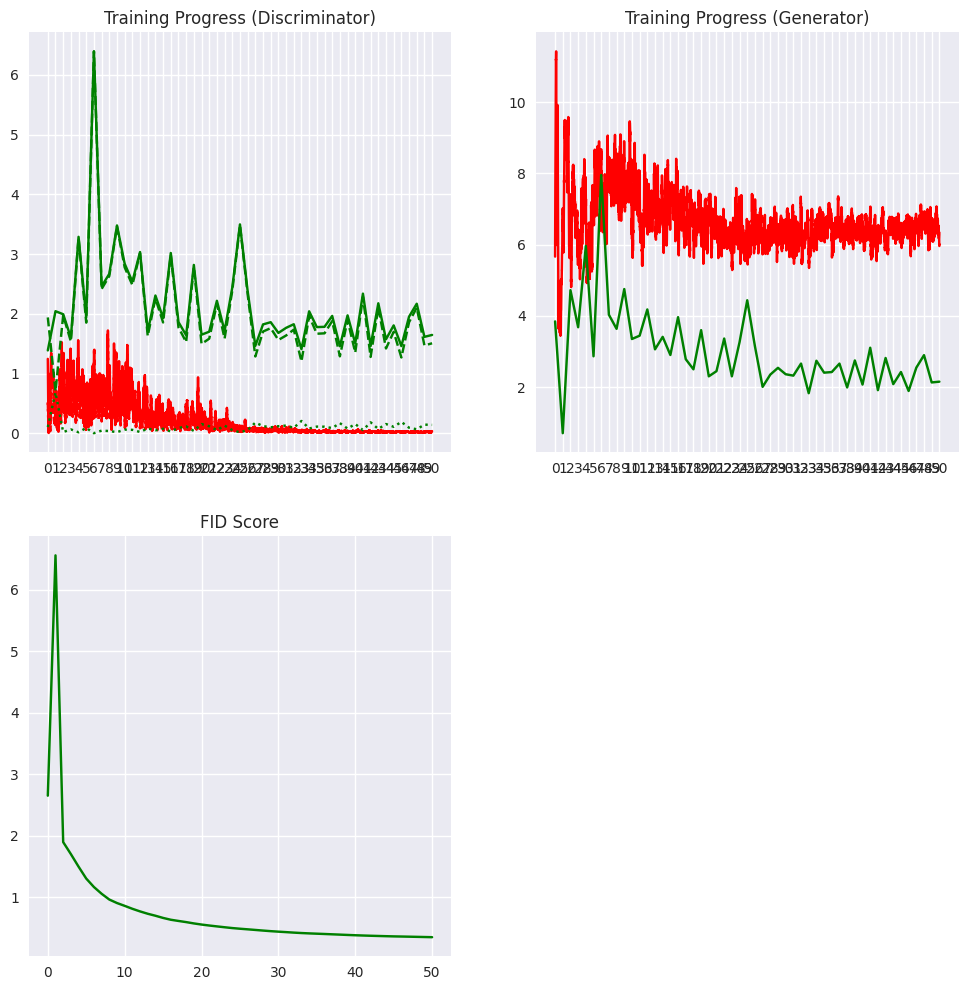

In [33]:
plt.style.use('seaborn-v0_8')

x_ticks_pos = np.arange(0, trainer.config['num_iterations']*(trainer.config['num_epochs']+1), trainer.config['num_iterations'])
x_ticks = np.arange(0,trainer.config['num_epochs']+1)

fig, ax = plt.subplots(2,2, figsize=(12,12))

ax[0][0].plot(tg.visualization.smooth_curve(train_disc_loss, K=31), c='r', label='Train Loss')
ax[0][0].plot(tg.visualization.smooth_curve(train_disc_loss_real, K=31), c='r', linestyle='--', label='Train Loss (real)')
ax[0][0].plot(tg.visualization.smooth_curve(train_disc_loss_real, K=31), c='r', linestyle=':', label='Train Loss (fake)')
ax[0][0].legend()

ax[0][0].plot(x_ticks_pos, eval_disc_loss, c='g', label='Eval. Loss')
ax[0][0].plot(x_ticks_pos, eval_disc_loss_real, c='g', linestyle='--', label='Eval. Loss (real)')
ax[0][0].plot(x_ticks_pos, eval_disc_loss_fake, c='g', linestyle=':', label='Eval. Loss (fake)')
ax[0][0].set_xticks(x_ticks_pos, x_ticks)
ax[0][0].set_title("Training Progress (Discriminator)")

ax[0][1].plot(tg.visualization.smooth_curve(train_gen_loss, K=31), c='r', label='Train Loss')
ax[0][1].plot(x_ticks_pos, eval_gen_loss, c='g', label='Eval. Loss')
ax[0][1].set_xticks(x_ticks_pos, x_ticks)
ax[0][1].set_title("Training Progress (Generator)")
ax[0][1].legend()


ax[1][0].plot(fid, c='g', label='Eval. FID')
ax[1][0].set_title("FID Score")
ax[1][0].legend()


ax[1][1].axis('off')


### Generation Samples

Here we can see that the GAN is able to produce new images conditioned on the class label. We can already observe a mode collapse as a lot of images look alike.

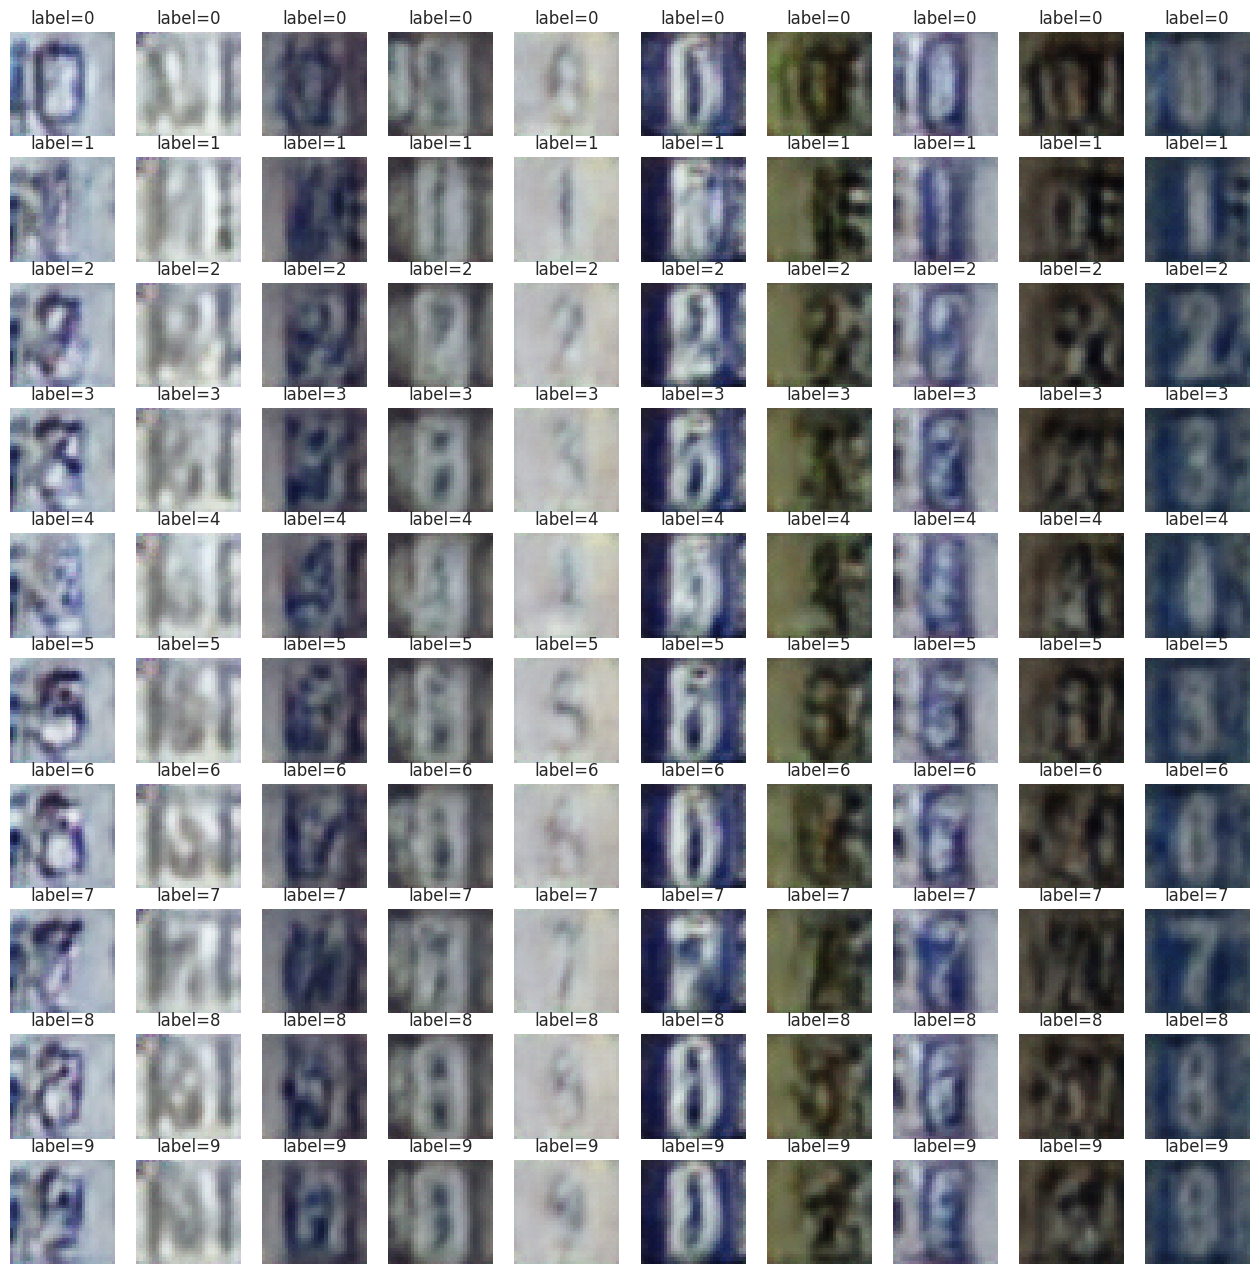

In [37]:
labels = torch.arange(0,10)
latents = trainer._sample_latent(size=10).float()

fig, ax = plt.subplots(10,10, figsize=(16,16))

for i in range(labels.shape[0]):
    inp_lbl = torch.nn.functional.one_hot(torch.repeat_interleave(labels[i].unsqueeze(0), 10, dim=0), num_classes=10).float()
    gen_out = trainer.generate(latents.to(device), inp_lbl.to(device))
    for j in range(10):
        ax[i][j].imshow(gen_out[j].permute(1,2,0).cpu())
        ax[i][j].axis('off')
        ax[i][j].set_title(f'label={labels[i]}')


## Task 2: Food101 Dataset

### Model

In [39]:
exp_name = "food101_gan"
run_name = "run_2"
epoch = 50
trainer = Trainer(exp_name, run_name)
load_model_from_checkpoint(exp_name, run_name, trainer.gan, epoch)

Model checkpoint was load from: /home/user/denninge/VisionLabSS23/Assignments_7/experiments/food101_gan/run_2/checkpoints/checkpoint_50.pth


#### Generator

In [40]:
trainer.gan.generator

Generator(
  (latent_emb): Sequential(
    (0): Reshape()
    (1): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(2, 2))
        (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
  )
  (model): Sequential(
    (0): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
    (1): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
    (2): ConvTransposeBlock(
      (b

#### Discriminator

### Training Progress

In [45]:
##-- Load TensorBoard Logs --##
log_dir = P(os.getcwd(), 'experiments', exp_name, run_name, 'logs')
reader = SummaryReader(log_dir, pivot=True)
train_data = reader.scalars

train_disc_loss = train_data.loc[:,'iteration_metrics/train/disc_loss'].to_numpy().astype(float)
train_disc_loss_real= train_data.loc[:,'iteration_metrics/train/disc_loss_real'].to_numpy().astype(float)
train_disc_loss_fake = train_data.loc[:,'iteration_metrics/train/disc_loss_fake'].to_numpy().astype(float)
train_gen_loss = train_data.loc[:,'iteration_metrics/train/gen_loss'].to_numpy().astype(float)

eval_disc_loss = train_data.loc[:,'epoch_metrics/test/disc_loss']
eval_disc_loss_real= train_data.loc[:,'epoch_metrics/test/disc_loss_real']
eval_disc_loss_fake = train_data.loc[:,'epoch_metrics/test/disc_loss_fake']
eval_gen_loss = train_data.loc[:,'epoch_metrics/test/gen_loss']
fid = train_data.loc[:,'epoch_metrics/test/fid_score']

tmp = eval_disc_loss[0][1]
eval_disc_loss[0] = eval_disc_loss[0][0]
eval_disc_loss = eval_disc_loss.to_numpy().astype(float).tolist()
eval_disc_loss.insert(1, tmp)
eval_disc_loss = np.asarray(eval_disc_loss)

tmp = eval_disc_loss_real[0][1]
eval_disc_loss_real[0] = eval_disc_loss_real[0][0]
eval_disc_loss_real = eval_disc_loss_real.to_numpy().astype(float).tolist()
eval_disc_loss_real.insert(1, tmp)
eval_disc_loss_real = np.asarray(eval_disc_loss_real)


tmp = eval_disc_loss_fake[0][1]
eval_disc_loss_fake[0] = eval_disc_loss_fake[0][0]
eval_disc_loss_fake = eval_disc_loss_fake.to_numpy().astype(float).tolist()
eval_disc_loss_fake.insert(1, tmp)
eval_disc_loss_fake = np.asarray(eval_disc_loss_fake)


tmp = eval_gen_loss[0][1]
eval_gen_loss[0] = eval_gen_loss[0][0]
eval_gen_loss = eval_gen_loss.to_numpy().astype(float).tolist()
eval_gen_loss.insert(1, tmp)
eval_gen_loss = np.asarray(eval_gen_loss)


tmp = fid[0][1]
fid[0] = fid[0][0]
fid = fid.to_numpy().astype(float).tolist()
fid.insert(1, tmp)
fid = np.asarray(fid)


train_disc_loss = train_disc_loss[~np.isnan(train_disc_loss)]
train_disc_loss_real = train_disc_loss_real[~np.isnan(train_disc_loss_real)]
train_disc_loss_fake = train_disc_loss_fake[~np.isnan(train_disc_loss_fake)]
train_gen_loss = train_gen_loss[~np.isnan(train_gen_loss)]

eval_disc_loss = eval_disc_loss[~np.isnan(eval_disc_loss)]
eval_disc_loss_real = eval_disc_loss_real[~np.isnan(eval_disc_loss_real)]
eval_disc_loss_fake = eval_disc_loss_fake[~np.isnan(eval_disc_loss_fake)]
eval_gen_loss = eval_gen_loss[~np.isnan(eval_gen_loss)]
fid = fid[~np.isnan(fid)]

/tmp/ipykernel_655765/3027527051.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_disc_loss[0] = eval_disc_loss[0][0]
/tmp/ipykernel_655765/3027527051.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_disc_loss_real[0] = eval_disc_loss_real[0][0]
/tmp/ipykernel_655765/3027527051.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_disc_loss_fake[0] = eval_disc_loss_fake[0][0]
/tmp/ipykernel_655765/3027527051.py:38

(0.0, 1.0, 0.0, 1.0)

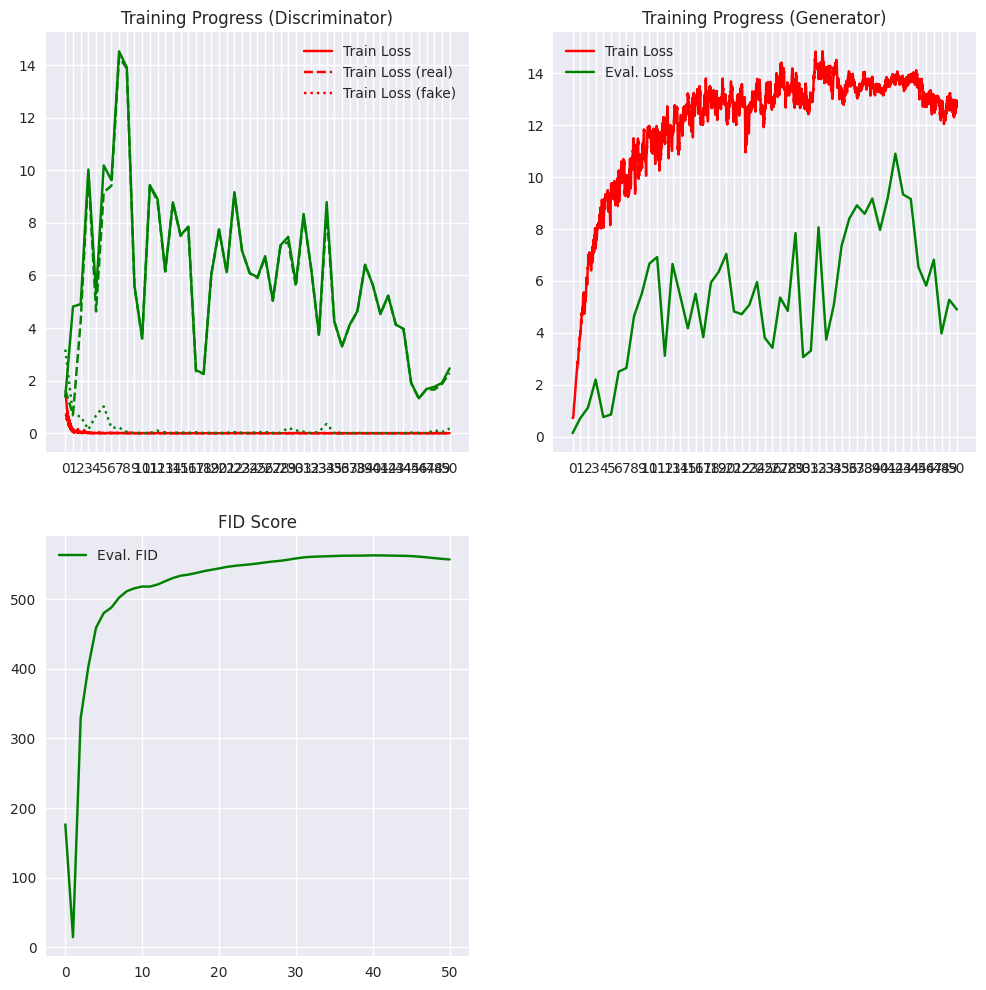

In [46]:
plt.style.use('seaborn-v0_8')

x_ticks_pos = np.arange(0, trainer.config['num_iterations']*(trainer.config['num_epochs']+1), trainer.config['num_iterations'])
x_ticks = np.arange(0,trainer.config['num_epochs']+1)

fig, ax = plt.subplots(2,2, figsize=(12,12))

ax[0][0].plot(tg.visualization.smooth_curve(train_disc_loss, K=31), c='r', label='Train Loss')
ax[0][0].plot(tg.visualization.smooth_curve(train_disc_loss_real, K=31), c='r', linestyle='--', label='Train Loss (real)')
ax[0][0].plot(tg.visualization.smooth_curve(train_disc_loss_real, K=31), c='r', linestyle=':', label='Train Loss (fake)')
ax[0][0].legend()

ax[0][0].plot(x_ticks_pos, eval_disc_loss, c='g', label='Eval. Loss')
ax[0][0].plot(x_ticks_pos, eval_disc_loss_real, c='g', linestyle='--', label='Eval. Loss (real)')
ax[0][0].plot(x_ticks_pos, eval_disc_loss_fake, c='g', linestyle=':', label='Eval. Loss (fake)')
ax[0][0].set_xticks(x_ticks_pos, x_ticks)
ax[0][0].set_title("Training Progress (Discriminator)")

ax[0][1].plot(tg.visualization.smooth_curve(train_gen_loss, K=31), c='r', label='Train Loss')
ax[0][1].plot(x_ticks_pos, eval_gen_loss, c='g', label='Eval. Loss')
ax[0][1].set_xticks(x_ticks_pos, x_ticks)
ax[0][1].set_title("Training Progress (Generator)")
ax[0][1].legend()


ax[1][0].plot(fid, c='g', label='Eval. FID')
ax[1][0].set_title("FID Score")
ax[1][0].legend()


ax[1][1].axis('off')


### Generation Samples

Training on the harder dataset Food101 using a normal DCGAN did not work with our architecture. As our DCGAN works with other dataset we assume that this can be fixed by further tuning. We experienced a bit better results with smaller architectures. But there we also had mode collapse.

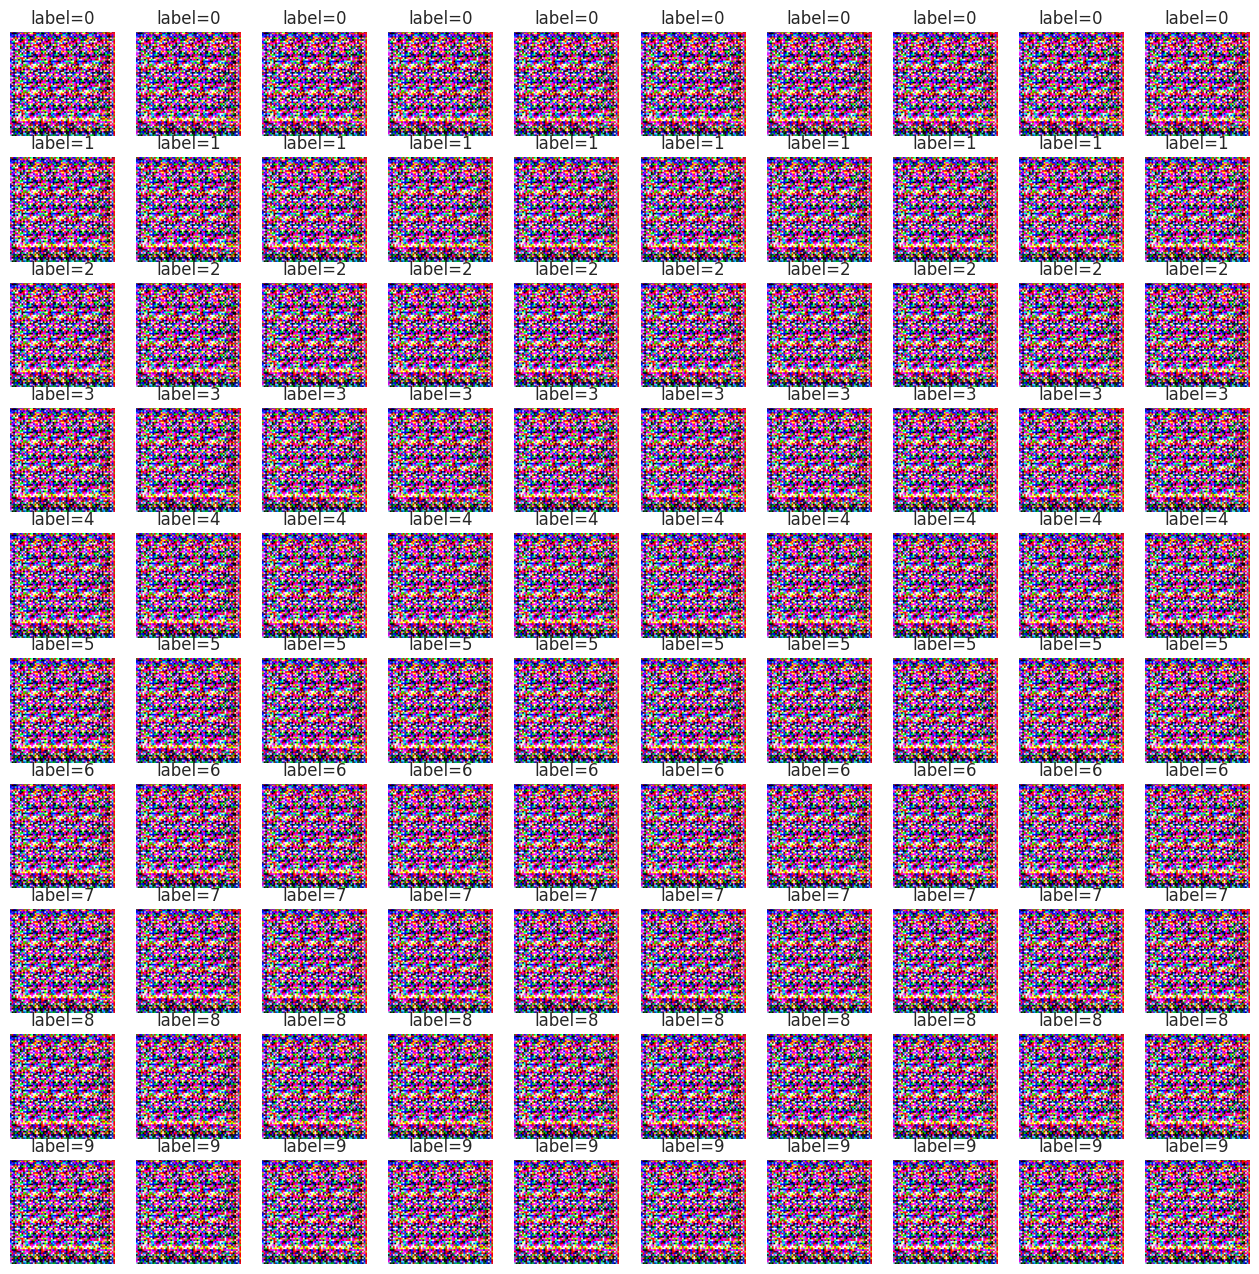

In [47]:
latents = trainer._sample_latent(size=100).float()

fig, ax = plt.subplots(10,10, figsize=(16,16))
gen_out = trainer.generate(latents.to(device))

img_ind = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(gen_out[img_ind].permute(1,2,0).cpu())
        ax[i][j].axis('off')
        ax[i][j].set_title(f'label={labels[i]}')

### Conditional Model

In [49]:
exp_name = "food101_gan"
run_name = "cond_run_1"
epoch = 50
trainer = Trainer(exp_name, run_name)
load_model_from_checkpoint(exp_name, run_name, trainer.gan, epoch)

Model checkpoint was load from: /home/user/denninge/VisionLabSS23/Assignments_7/experiments/food101_gan/cond_run_1/checkpoints/checkpoint_50.pth


#### Generator

In [50]:
trainer.gan.generator

Generator(
  (latent_emb): Sequential(
    (0): Reshape()
    (1): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(2, 2))
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
  )
  (label_emb): Sequential(
    (0): Reshape()
    (1): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(101, 512, kernel_size=(4, 4), stride=(2, 2))
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
  )
  (model): Sequential(
    (0): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
    (

#### Discriminator

In [51]:
trainer.gan.discriminator

Discriminator(
  (img_emb): Sequential(
    (0): ConvBlock(
      (block): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
        (3): Dropout(p=0.3, inplace=False)
      )
    )
  )
  (label_emb): Sequential(
    (0): ConvBlock(
      (block): Sequential(
        (0): Conv2d(101, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
        (3): Dropout(p=0.3, inplace=False)
      )
    )
  )
  (model): Sequential(
    (0): ConvBlock(
      (block): Sequential(
        (0): Conv2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)

### Training Progress

In [52]:
##-- Load TensorBoard Logs --##
log_dir = P(os.getcwd(), 'experiments', exp_name, run_name, 'logs')
reader = SummaryReader(log_dir, pivot=True)
train_data = reader.scalars

train_disc_loss = train_data.loc[:,'iteration_metrics/train/disc_loss'].to_numpy().astype(float)
train_disc_loss_real= train_data.loc[:,'iteration_metrics/train/disc_loss_real'].to_numpy().astype(float)
train_disc_loss_fake = train_data.loc[:,'iteration_metrics/train/disc_loss_fake'].to_numpy().astype(float)
train_gen_loss = train_data.loc[:,'iteration_metrics/train/gen_loss'].to_numpy().astype(float)

eval_disc_loss = train_data.loc[:,'epoch_metrics/test/disc_loss']
eval_disc_loss_real= train_data.loc[:,'epoch_metrics/test/disc_loss_real']
eval_disc_loss_fake = train_data.loc[:,'epoch_metrics/test/disc_loss_fake']
eval_gen_loss = train_data.loc[:,'epoch_metrics/test/gen_loss']
fid = train_data.loc[:,'epoch_metrics/test/fid_score']

tmp = eval_disc_loss[0][1]
eval_disc_loss[0] = eval_disc_loss[0][0]
eval_disc_loss = eval_disc_loss.to_numpy().astype(float).tolist()
eval_disc_loss.insert(1, tmp)
eval_disc_loss = np.asarray(eval_disc_loss)

tmp = eval_disc_loss_real[0][1]
eval_disc_loss_real[0] = eval_disc_loss_real[0][0]
eval_disc_loss_real = eval_disc_loss_real.to_numpy().astype(float).tolist()
eval_disc_loss_real.insert(1, tmp)
eval_disc_loss_real = np.asarray(eval_disc_loss_real)


tmp = eval_disc_loss_fake[0][1]
eval_disc_loss_fake[0] = eval_disc_loss_fake[0][0]
eval_disc_loss_fake = eval_disc_loss_fake.to_numpy().astype(float).tolist()
eval_disc_loss_fake.insert(1, tmp)
eval_disc_loss_fake = np.asarray(eval_disc_loss_fake)


tmp = eval_gen_loss[0][1]
eval_gen_loss[0] = eval_gen_loss[0][0]
eval_gen_loss = eval_gen_loss.to_numpy().astype(float).tolist()
eval_gen_loss.insert(1, tmp)
eval_gen_loss = np.asarray(eval_gen_loss)


tmp = fid[0][1]
fid[0] = fid[0][0]
fid = fid.to_numpy().astype(float).tolist()
fid.insert(1, tmp)
fid = np.asarray(fid)


train_disc_loss = train_disc_loss[~np.isnan(train_disc_loss)]
train_disc_loss_real = train_disc_loss_real[~np.isnan(train_disc_loss_real)]
train_disc_loss_fake = train_disc_loss_fake[~np.isnan(train_disc_loss_fake)]
train_gen_loss = train_gen_loss[~np.isnan(train_gen_loss)]

eval_disc_loss = eval_disc_loss[~np.isnan(eval_disc_loss)]
eval_disc_loss_real = eval_disc_loss_real[~np.isnan(eval_disc_loss_real)]
eval_disc_loss_fake = eval_disc_loss_fake[~np.isnan(eval_disc_loss_fake)]
eval_gen_loss = eval_gen_loss[~np.isnan(eval_gen_loss)]
fid = fid[~np.isnan(fid)]

/tmp/ipykernel_655765/3027527051.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_disc_loss[0] = eval_disc_loss[0][0]
/tmp/ipykernel_655765/3027527051.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_disc_loss_real[0] = eval_disc_loss_real[0][0]
/tmp/ipykernel_655765/3027527051.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_disc_loss_fake[0] = eval_disc_loss_fake[0][0]
/tmp/ipykernel_655765/3027527051.py:38

(0.0, 1.0, 0.0, 1.0)

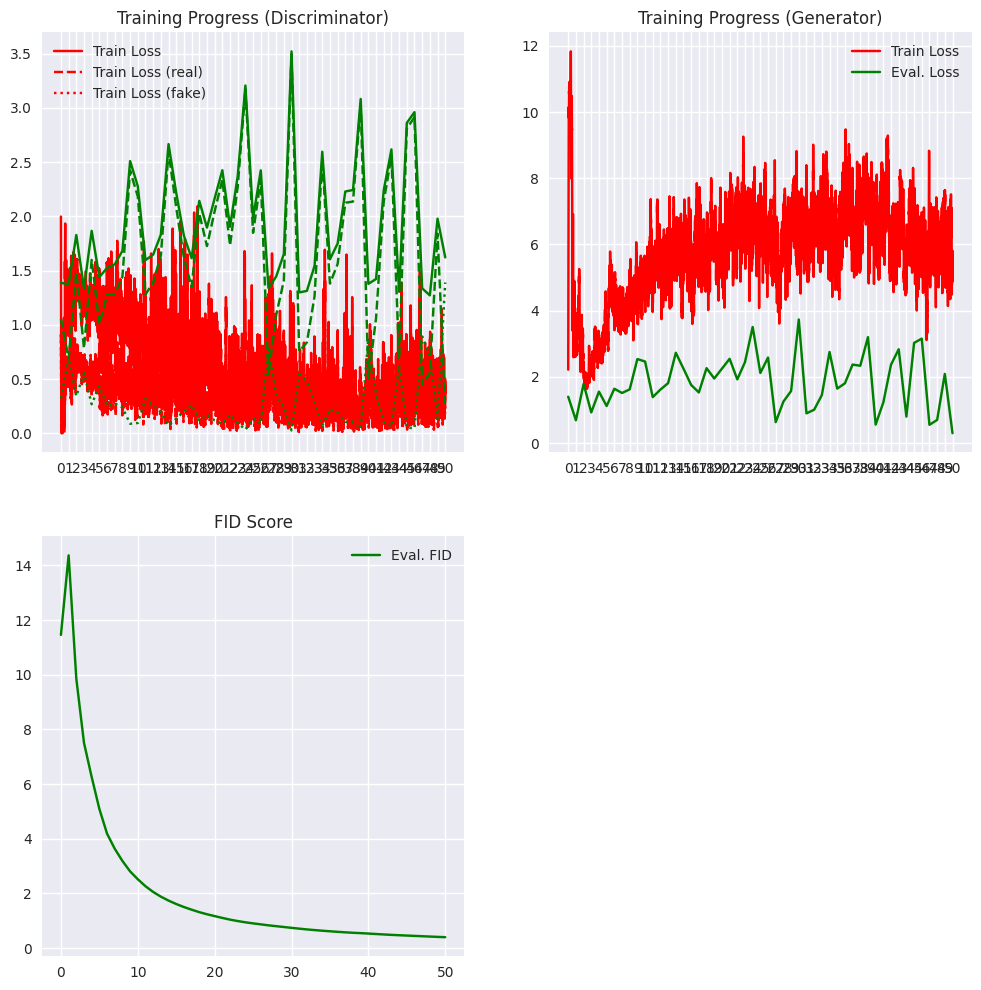

In [53]:
plt.style.use('seaborn-v0_8')

x_ticks_pos = np.arange(0, trainer.config['num_iterations']*(trainer.config['num_epochs']+1), trainer.config['num_iterations'])
x_ticks = np.arange(0,trainer.config['num_epochs']+1)

fig, ax = plt.subplots(2,2, figsize=(12,12))

ax[0][0].plot(tg.visualization.smooth_curve(train_disc_loss, K=31), c='r', label='Train Loss')
ax[0][0].plot(tg.visualization.smooth_curve(train_disc_loss_real, K=31), c='r', linestyle='--', label='Train Loss (real)')
ax[0][0].plot(tg.visualization.smooth_curve(train_disc_loss_real, K=31), c='r', linestyle=':', label='Train Loss (fake)')
ax[0][0].legend()

ax[0][0].plot(x_ticks_pos, eval_disc_loss, c='g', label='Eval. Loss')
ax[0][0].plot(x_ticks_pos, eval_disc_loss_real, c='g', linestyle='--', label='Eval. Loss (real)')
ax[0][0].plot(x_ticks_pos, eval_disc_loss_fake, c='g', linestyle=':', label='Eval. Loss (fake)')
ax[0][0].set_xticks(x_ticks_pos, x_ticks)
ax[0][0].set_title("Training Progress (Discriminator)")

ax[0][1].plot(tg.visualization.smooth_curve(train_gen_loss, K=31), c='r', label='Train Loss')
ax[0][1].plot(x_ticks_pos, eval_gen_loss, c='g', label='Eval. Loss')
ax[0][1].set_xticks(x_ticks_pos, x_ticks)
ax[0][1].set_title("Training Progress (Generator)")
ax[0][1].legend()


ax[1][0].plot(fid, c='g', label='Eval. FID')
ax[1][0].set_title("FID Score")
ax[1][0].legend()


ax[1][1].axis('off')


### Generation Samples

The conditioned GAN works much better as it is less  likely to collapse to a single image that cannot be distinguished by the discriminator. The condition forces the model to produce images from a given category.

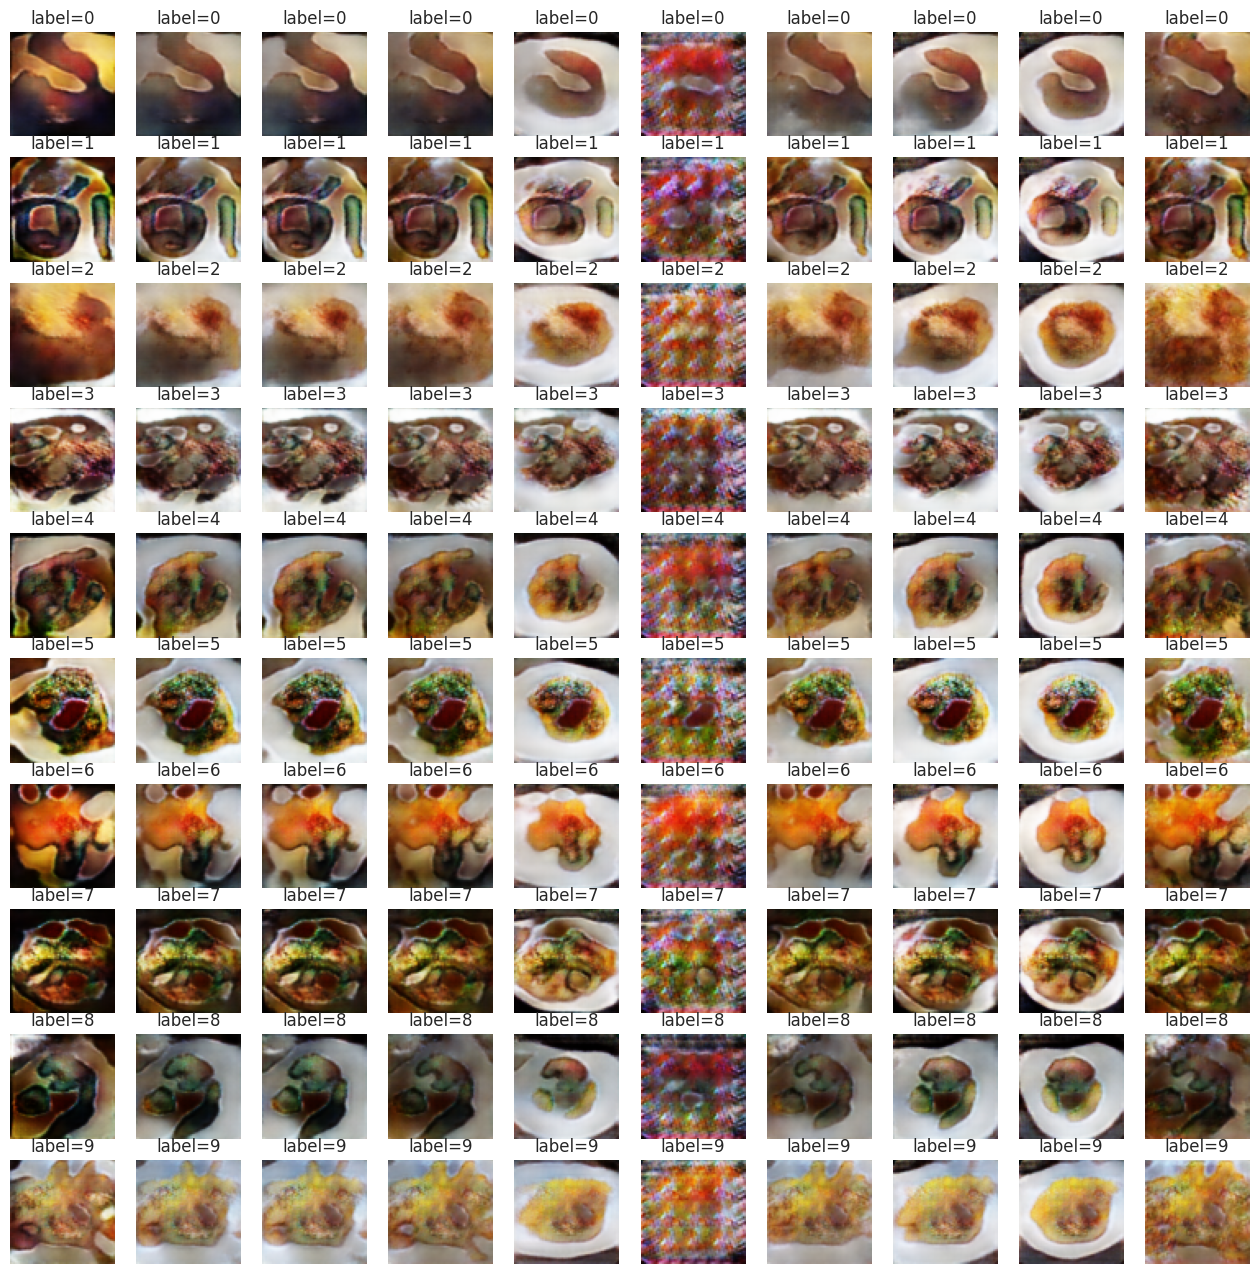

In [56]:
labels = torch.arange(0,10)
latents = trainer._sample_latent(size=10).float()

fig, ax = plt.subplots(10,10, figsize=(16,16))

for i in range(labels.shape[0]):
    inp_lbl = torch.nn.functional.one_hot(torch.repeat_interleave(labels[i].unsqueeze(0), 10, dim=0), num_classes=101).float()
    gen_out = trainer.generate(latents.to(device), inp_lbl.to(device))
    for j in range(10):
        ax[i][j].imshow(gen_out[j].permute(1,2,0).cpu())
        ax[i][j].axis('off')
        ax[i][j].set_title(f'label={labels[i]}')

